###  selective search를 이용하여 Object Detection을 위한 Region Proposal 영역을 도출

#### selectivesearch를 설치하고 이미지를 로드

In [1]:
pip install selectivesearch

  Created wheel for selectivesearch: filename=selectivesearch-0.4-py3-none-any.whl size=4359 sha256=83507e3028a351cba5a4914ed44d7a0e0c4cc528134151b767254f1d63057eb3
  Stored in directory: c:\users\ad\appdata\local\pip\cache\wheels\66\4e\88\6de23ce74be839a953498c4ebdfa809ad7da9422ac89ae856c
Successfully built selectivesearch
  Attempting uninstall: decorator
    Found existing installation: decorator 5.0.7
    Uninstalling decorator-5.0.7:
      Successfully uninstalled decorator-5.0.7
Note: you may need to restart the kernel to use updated packages.


img shape: (450, 740, 3)


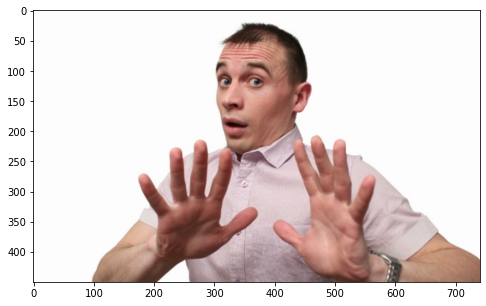

In [32]:
import selectivesearch
import cv2
import matplotlib.pyplot as plt
import os
%matplotlib inline

### 오드리헵번 이미지를 cv2로 로드하고 matplotlib으로 시각화 
img = cv2.imread('sample.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('img shape:', img.shape)

plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.show()

In [23]:
import selectivesearch 

#selectivesearch.selective_search()는 이미지의 Region Proposal정보를 반환 
_, regions = selectivesearch.selective_search(img_rgb, scale=100, min_size=2000)

print(type(regions), len(regions))

<class 'list'> 39


#### 반환된 Region Proposal(후보 영역)에 대한 정보 보기. 
반환된 regions 변수는 리스트 타입으로 세부 원소로 딕셔너리를 가지고 있음. 
개별 딕셔너리내 KEY값별 의미
* rect 키값은 x,y 시작 좌표와 너비, 높이 값을 가지며 이 값이 Detected Object 후보를 나타내는 Bounding box임. 
* size는 Object의 크기
* labels는 해당 rect로 지정된 Bounding Box내에 있는 오브젝트들의 고유 ID
* 아래로 내려갈 수록 너비와 높이 값이 큰 Bounding box이며 하나의 Bounding box에 여러개의 오브젝트가 있을 확률이 커짐. 

In [24]:
regions

[{'rect': (0, 0, 739, 449), 'size': 183842, 'labels': [0.0]},
 {'rect': (93, 14, 646, 435), 'size': 16746, 'labels': [1.0]},
 {'rect': (316, 22, 135, 100), 'size': 4110, 'labels': [2.0]},
 {'rect': (303, 39, 156, 217), 'size': 22146, 'labels': [3.0]},
 {'rect': (345, 179, 106, 82), 'size': 3372, 'labels': [4.0]},
 {'rect': (435, 208, 90, 107), 'size': 6517, 'labels': [5.0]},
 {'rect': (248, 215, 38, 96), 'size': 2758, 'labels': [6.0]},
 {'rect': (174, 220, 153, 229), 'size': 16149, 'labels': [7.0]},
 {'rect': (323, 229, 158, 171), 'size': 13252, 'labels': [8.0]},
 {'rect': (518, 236, 124, 124), 'size': 5082, 'labels': [9.0]},
 {'rect': (309, 261, 55, 95), 'size': 2744, 'labels': [10.0]},
 {'rect': (458, 274, 106, 150), 'size': 6987, 'labels': [11.0]},
 {'rect': (398, 306, 164, 143), 'size': 6637, 'labels': [12.0]},
 {'rect': (253, 327, 117, 77), 'size': 3757, 'labels': [13.0]},
 {'rect': (548, 328, 123, 121), 'size': 8282, 'labels': [14.0]},
 {'rect': (98, 342, 126, 107), 'size': 7441,

In [25]:
# rect정보만 출력해서 보기
cand_rects = [cand['rect'] for cand in regions]
print(cand_rects)

[(0, 0, 739, 449), (93, 14, 646, 435), (316, 22, 135, 100), (303, 39, 156, 217), (345, 179, 106, 82), (435, 208, 90, 107), (248, 215, 38, 96), (174, 220, 153, 229), (323, 229, 158, 171), (518, 236, 124, 124), (309, 261, 55, 95), (458, 274, 106, 150), (398, 306, 164, 143), (253, 327, 117, 77), (548, 328, 123, 121), (98, 342, 126, 107), (327, 352, 134, 97), (585, 367, 154, 82), (208, 370, 141, 79), (431, 384, 121, 65), (309, 229, 172, 171), (208, 352, 253, 97), (518, 236, 153, 213), (303, 39, 156, 222), (98, 342, 363, 107), (435, 208, 129, 216), (98, 208, 466, 241), (174, 220, 196, 229), (398, 236, 273, 213), (309, 229, 362, 220), (98, 39, 466, 410), (309, 229, 430, 220), (174, 220, 565, 229), (174, 220, 565, 229), (98, 39, 641, 410), (0, 0, 739, 449), (0, 0, 739, 449), (0, 0, 739, 449), (0, 0, 739, 449)]


**bounding box를 시각화 하기**

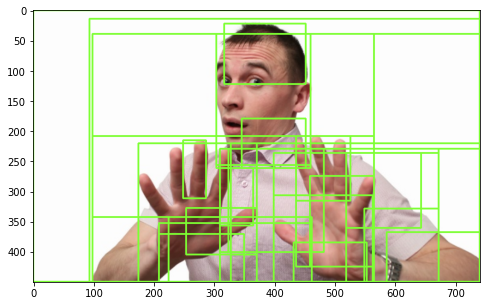

In [26]:
# opencv의 rectangle()을 이용하여 시각화
# rectangle()은 이미지와 좌상단 좌표, 우하단 좌표, box컬러색, 두께등을 인자로 입력하면 원본 이미지에 box를 그려줌. 

green_rgb = (125, 255, 51)
img_rgb_copy = img_rgb.copy()
for rect in cand_rects:
    
    left = rect[0]
    top = rect[1]
    # rect[2], rect[3]은 너비와 높이이므로 우하단 좌표를 구하기 위해 좌상단 좌표에 각각을 더함. 
    right = left + rect[2]
    bottom = top + rect[3]
    
    img_rgb_copy = cv2.rectangle(img_rgb_copy, (left, top), (right, bottom), color=green_rgb, thickness=2)
    
plt.figure(figsize=(8, 8))
plt.imshow(img_rgb_copy)
plt.show()

#### bounding box의 크기가 큰 후보만 추출

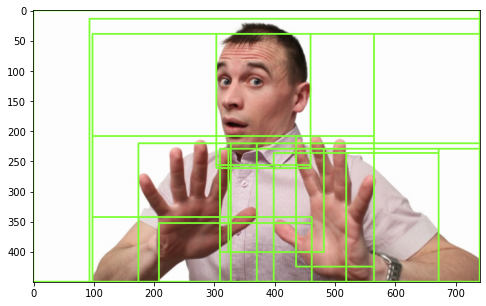

In [27]:
cand_rects = [cand['rect'] for cand in regions if cand['size'] > 10000]

green_rgb = (125, 255, 51)
img_rgb_copy = img_rgb.copy()
for rect in cand_rects:
    
    left = rect[0]
    top = rect[1]
    # rect[2], rect[3]은 너비와 높이이므로 우하단 좌표를 구하기 위해 좌상단 좌표에 각각을 더함. 
    right = left + rect[2]
    bottom = top + rect[3]
    
    img_rgb_copy = cv2.rectangle(img_rgb_copy, (left, top), (right, bottom), color=green_rgb, thickness=2)
    
plt.figure(figsize=(8, 8))
plt.imshow(img_rgb_copy)
plt.show()

### IOU 구하기

#### 입력인자로 후보 박스와 실제 박스를 받아서 IOU를 계산하는 함수 생성

In [28]:
import numpy as np 

def compute_iou(cand_box, gt_box):

    # Calculate intersection areas
    x1 = np.maximum(cand_box[0], gt_box[0])
    y1 = np.maximum(cand_box[1], gt_box[1])
    x2 = np.minimum(cand_box[2], gt_box[2])
    y2 = np.minimum(cand_box[3], gt_box[3])
    
    intersection = np.maximum(x2 - x1, 0) * np.maximum(y2 - y1, 0)
    
    cand_box_area = (cand_box[2] - cand_box[0]) * (cand_box[3] - cand_box[1])
    gt_box_area = (gt_box[2] - gt_box[0]) * (gt_box[3] - gt_box[1])
    union = cand_box_area + gt_box_area - intersection
    
    iou = intersection / union
    return iou

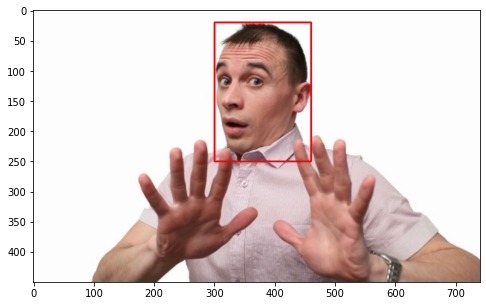

In [38]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# 실제 box(Ground Truth)의 좌표를 아래와 같다고 가정. 
gt_box = [300, 20, 460, 250]


img = cv2.imread('sample.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

red = (255, 0 , 0)
img_rgb = cv2.rectangle(img_rgb, (gt_box[0], gt_box[1]), (gt_box[2], gt_box[3]), color=red, thickness=2)

plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.show()

In [39]:
import selectivesearch

#selectivesearch.selective_search()는 이미지의 Region Proposal정보를 반환 
_, regions = selectivesearch.selective_search(img_rgb, scale=100, min_size=2000)

print(type(regions), len(regions))

<class 'list'> 41


In [40]:
cand_rects = [cand['rect'] for cand in regions]
for index, cand_box in enumerate(cand_rects):
    cand_box = list(cand_box)
    cand_box[2] += cand_box[0]
    cand_box[3] += cand_box[1]
    
    iou = compute_iou(cand_box, gt_box)
    print('index:', index, "iou:", iou)

index: 0 iou: 0.11090651003131301
index: 1 iou: 0.1309561937297605
index: 2 iou: 0.9791400595998297
index: 3 iou: 0.9580434782608696
index: 4 iou: 0.3858695652173913
index: 5 iou: 0.3283695652173913
index: 6 iou: 0.022696782423189427
index: 7 iou: 0.0
index: 8 iou: 0.03231056435785745
index: 9 iou: 0.0
index: 10 iou: 0.0
index: 11 iou: 0.0
index: 12 iou: 0.0
index: 13 iou: 0.0
index: 14 iou: 0.0
index: 15 iou: 0.0
index: 16 iou: 0.0
index: 17 iou: 0.0
index: 18 iou: 0.0
index: 19 iou: 0.0
index: 20 iou: 0.0
index: 21 iou: 0.0
index: 22 iou: 0.0
index: 23 iou: 0.0
index: 24 iou: 0.9580434782608696
index: 25 iou: 0.0
index: 26 iou: 0.016240715095052247
index: 27 iou: 0.04821573739242564
index: 28 iou: 0.03231056435785745
index: 29 iou: 0.00922609240973204
index: 30 iou: 0.018910118792042366
index: 31 iou: 0.9580434782608696
index: 32 iou: 0.2951722329651601
index: 33 iou: 0.04081003167522807
index: 34 iou: 0.03718074815447304
index: 35 iou: 0.1309561937297605
index: 36 iou: 0.11090651003

In [41]:
cand_rects = [cand['rect'] for cand in regions if cand['size'] > 5000]
cand_rects.sort()
cand_rects

[(0, 0, 739, 449),
 (0, 0, 739, 449),
 (0, 0, 739, 449),
 (0, 0, 739, 449),
 (93, 14, 646, 435),
 (93, 14, 646, 435),
 (98, 22, 641, 427),
 (98, 207, 466, 242),
 (98, 207, 573, 242),
 (98, 207, 641, 242),
 (98, 207, 641, 242),
 (98, 342, 126, 107),
 (98, 342, 363, 107),
 (174, 22, 284, 427),
 (174, 220, 216, 229),
 (174, 220, 216, 229),
 (208, 352, 253, 97),
 (208, 370, 141, 79),
 (302, 22, 156, 226),
 (302, 22, 156, 226),
 (302, 22, 156, 226),
 (309, 236, 362, 213),
 (309, 252, 172, 148),
 (316, 22, 142, 100),
 (327, 352, 134, 97),
 (329, 252, 152, 148),
 (398, 236, 273, 213),
 (398, 306, 164, 143),
 (436, 207, 89, 109),
 (436, 207, 128, 217),
 (458, 274, 106, 150),
 (518, 236, 124, 124),
 (518, 236, 153, 213),
 (548, 328, 123, 121),
 (585, 367, 154, 82)]

img shape: (450, 740, 3)
index: 2 iou: 0.9580434782608696 rectangle: (302, 22, 458, 248)
index: 20 iou: 0.9580434782608696 rectangle: (302, 22, 458, 248)
index: 27 iou: 0.9580434782608696 rectangle: (302, 22, 458, 248)


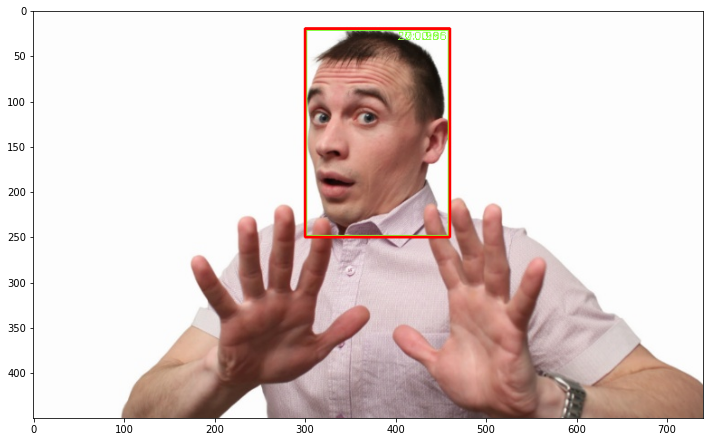

In [44]:
img = cv2.imread('sample.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('img shape:', img.shape)

green_rgb = (125, 255, 51)
cand_rects = [cand['rect'] for cand in regions if cand['size'] > 3000]
gt_box = [300, 20, 460, 250]
img_rgb = cv2.rectangle(img_rgb, (gt_box[0], gt_box[1]), (gt_box[2], gt_box[3]), color=red, thickness=2)

for index, cand_box in enumerate(cand_rects):
    
    cand_box = list(cand_box)
    cand_box[2] += cand_box[0]
    cand_box[3] += cand_box[1]
    
    iou = compute_iou(cand_box, gt_box)
    
    if iou > 0.5:
        print('index:', index, "iou:", iou, 'rectangle:',(cand_box[0], cand_box[1], cand_box[2], cand_box[3]) )
        cv2.rectangle(img_rgb, (cand_box[0], cand_box[1]), (cand_box[2], cand_box[3]), color=green_rgb, thickness=1)
        text = "{}: {:.2f}".format(index, iou)
        cv2.putText(img_rgb, text, (cand_box[0]+ 100, cand_box[1]+10), cv2.FONT_HERSHEY_SIMPLEX, 0.4, color=green_rgb, thickness=1)
    
plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)
plt.show()
    